In [ ]:
#Importing the libraries

import pandas as pd  #Data manipulation
import numpy as np   #Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sb  # Visualization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [ ]:
#Loading the dataset collected from the google form into an excel sheet
df=pd.read_csv('/content/SRM Student Academic Satisfaction Survey (Responses).csv')

In [ ]:
#Lets look into top few rows and columns in the dataset
df.head(5)

,Timestamp,Rate Quality of Teaching,Rate Course Content,Rate Course Organization,Rate Resources and Facilities,Rate Assessment and Feedback,Rate Student Engagement,Rate Learning Outcomes,Rate Support Services,Rate Overall Satisfaction
0,3/10/2023 20:09:44,4,4,4,5,4,3,5,4,3
1,3/10/2023 20:12:00,5,5,5,5,5,5,5,5,5
2,3/10/2023 20:13:34,4,4,4,4,4,3,3,3,4
3,3/10/2023 20:13:52,3,3,5,4,3,3,4,3,4
4,3/10/2023 20:14:07,4,3,3,3,5,3,3,3,4


In [ ]:
#Pre-Processing of the data
#1) To check whether there is missing values or not in the data
df.isnull().sum()

Timestamp                        0
Rate Quality of Teaching         0
Rate Course Content              0
Rate Course Organization         0
Rate Resources and Facilities    0
Rate Assessment and Feedback     0
Rate Student Engagement          0
Rate Learning Outcomes           0
Rate Support Services            0
Rate Overall Satisfaction        0
dtype: int64

In [ ]:
#2) Removing redundant features by keeping the numeric data only
df2=df.select_dtypes(include=[np.number])
df2.head(5)

,Rate Quality of Teaching,Rate Course Content,Rate Course Organization,Rate Resources and Facilities,Rate Assessment and Feedback,Rate Student Engagement,Rate Learning Outcomes,Rate Support Services,Rate Overall Satisfaction
0,4,4,4,5,4,3,5,4,3
1,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,3,3,3,4
3,3,3,5,4,3,3,4,3,4
4,4,3,3,3,5,3,3,3,4


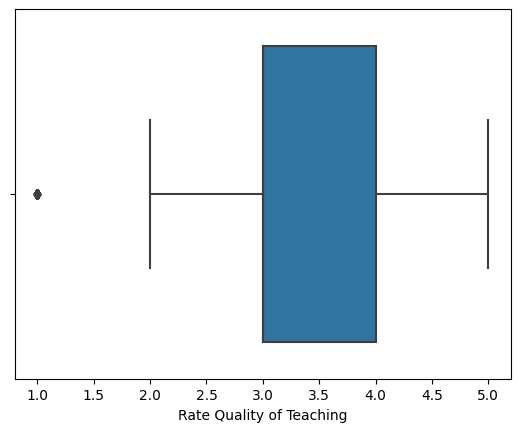

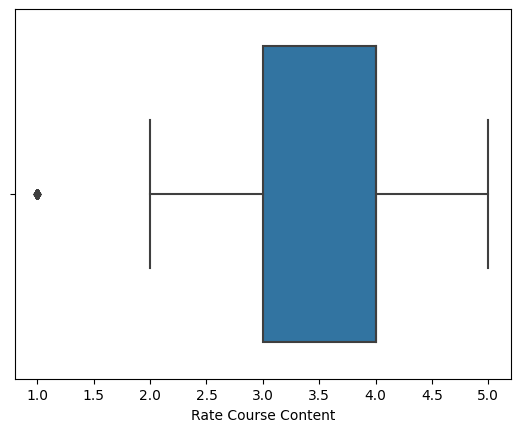

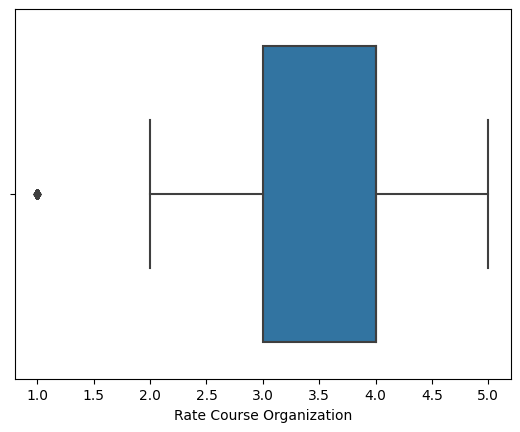

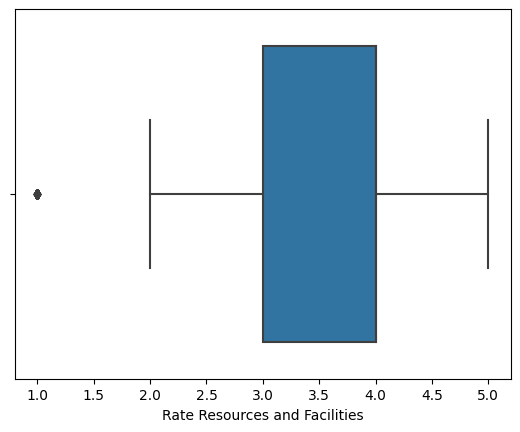

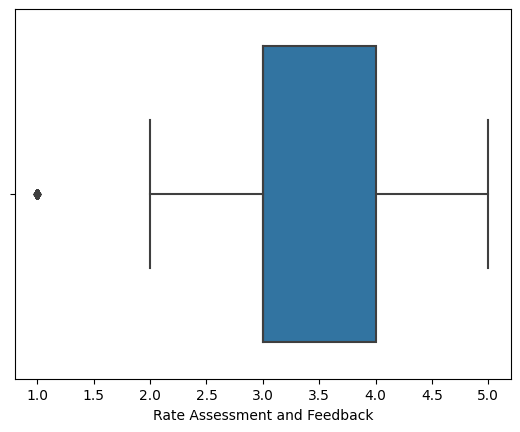

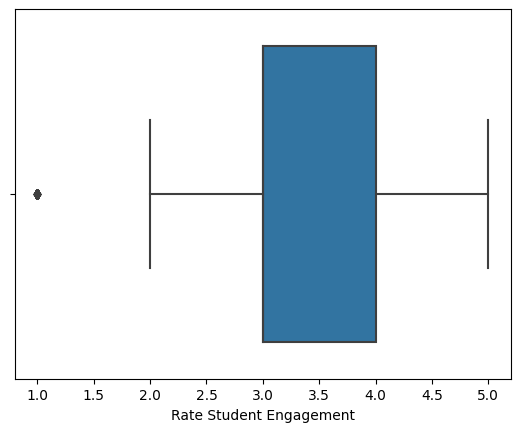

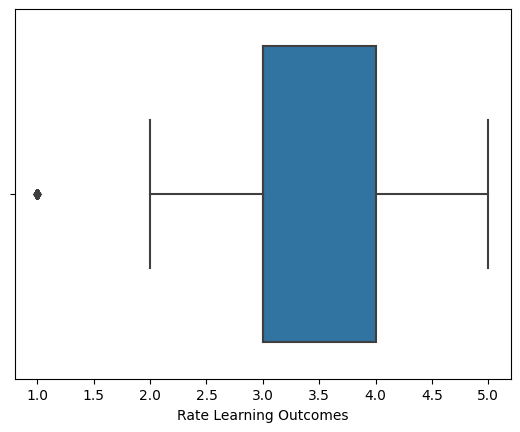

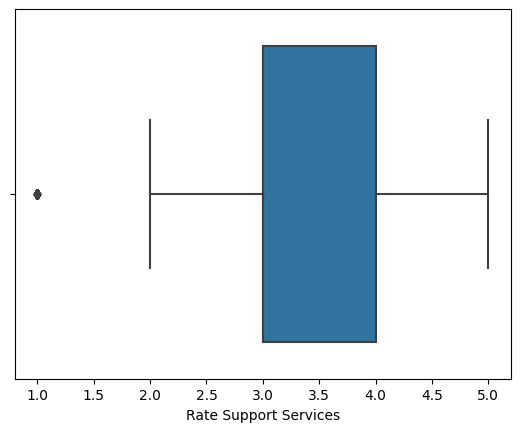

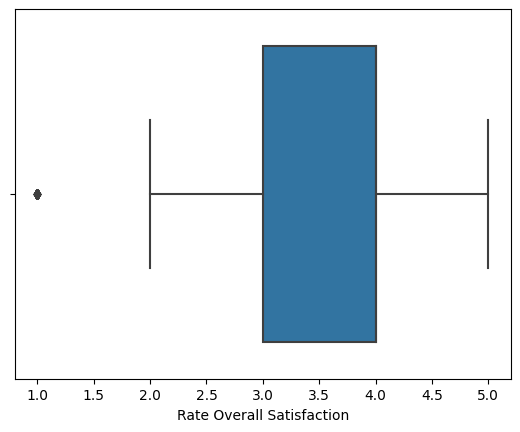

In [ ]:
#3) Checking for Outlier if any
for i in df2.columns:
    sb.boxplot(x=df2[i])
    plt.show()

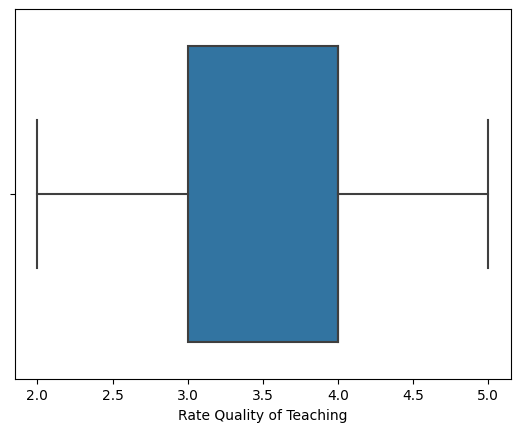

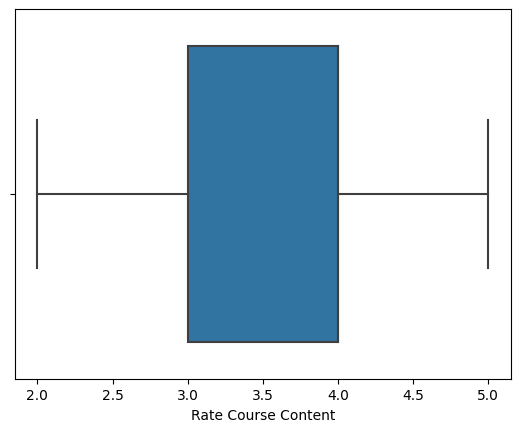

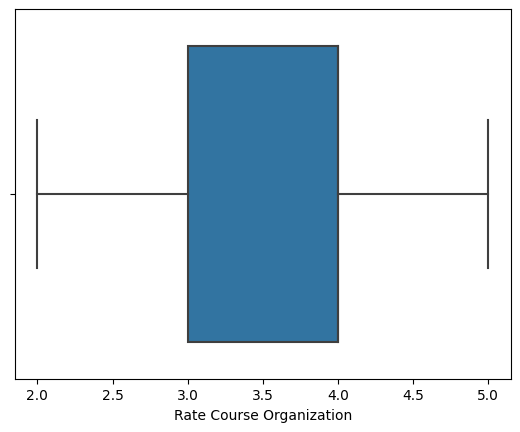

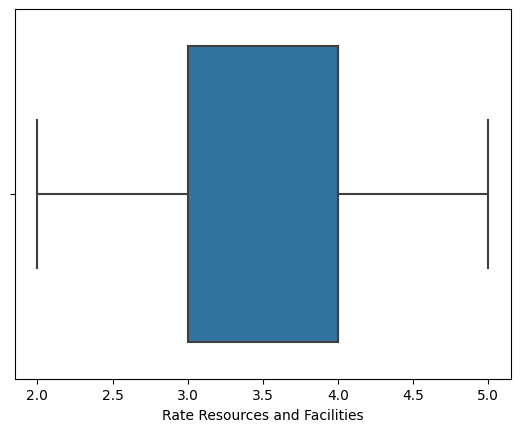

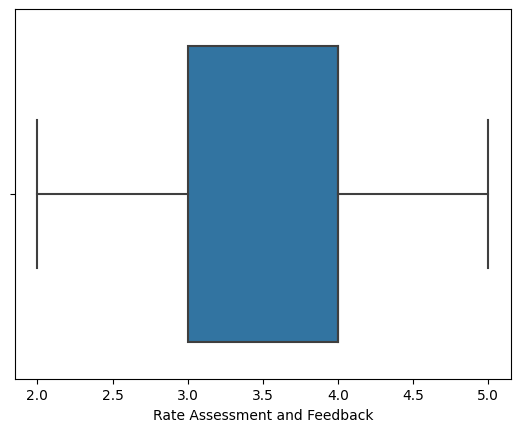

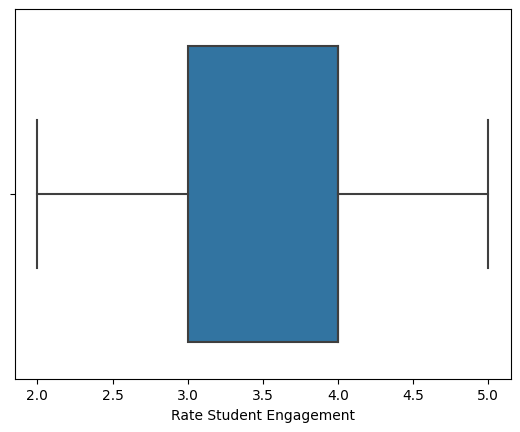

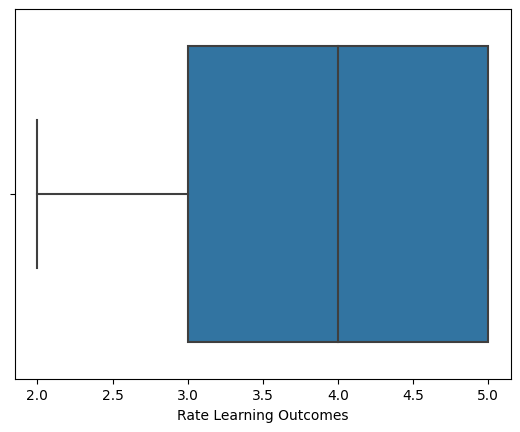

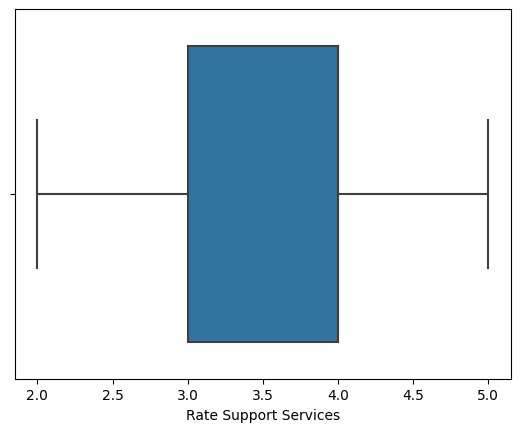

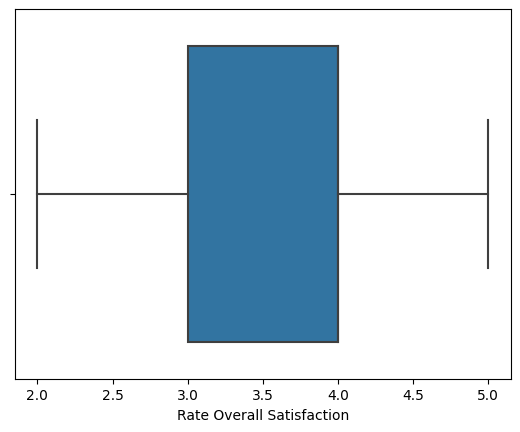

In [ ]:
#4)Outlier removal by dropping the outlier
for i in df2.columns: 
     q1=df2[i].quantile(0.25)
     q3=df2[i].quantile(0.75)
     iqr=q3-q1
     ub=q3+1.5*iqr
     lb=q1-1.5*iqr
     df3=df2[((df2[i]<ub) & (df2[i]>lb))]
     sb.boxplot(x=df3[i])
     plt.show()
     



<ipython-input-10-badb1867f7ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


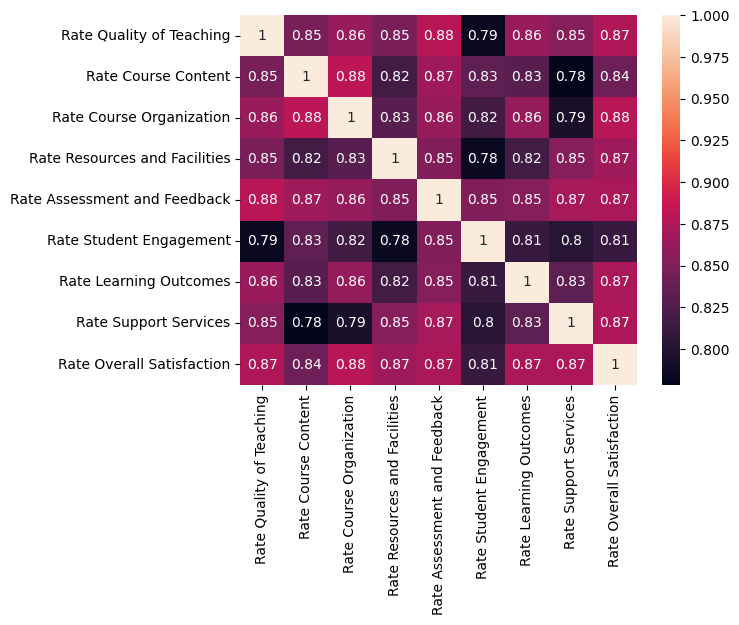

In [ ]:
#The correlation matrix is displayed below
corr_matrix=df.corr()
sb.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
#Training the Model

#Splitting the data into training and testing data

x_train,x_test,y_train,y_test=train_test_split(df3.drop('Rate Overall Satisfaction',axis=1),df3['Rate Overall Satisfaction'],test_size=0.20,random_state=42)


The Accuracy of the KNN model is : 94.08 %



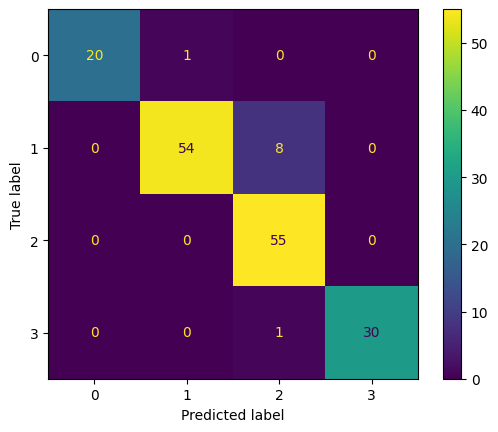

In [ ]:
#The KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predictknn=knn.predict(x_test)
accuracyknn=accuracy_score(y_test,predictknn)
print('\nThe Accuracy of the KNN model is :',round(accuracyknn*100,2),'%\n')
cm=confusion_matrix(y_test,predictknn)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()



The Accuracy of the Decision Tree Classifier model is : 98.82 %



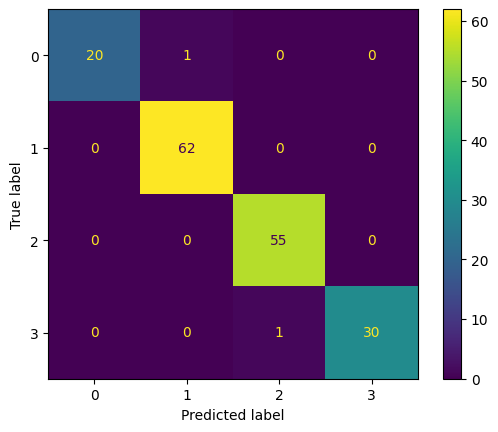

In [ ]:
#The Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
treemodel.fit(x_train,y_train)
predicttree=treemodel.predict(x_test)
accuracytree=accuracy_score(y_test,predicttree)
print('\nThe Accuracy of the Decision Tree Classifier model is :',round(accuracytree*100,2),'%\n')
cm=confusion_matrix(y_test,predicttree)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()



The Accuracy of the Random Forest Classifier model is : 98.82 %



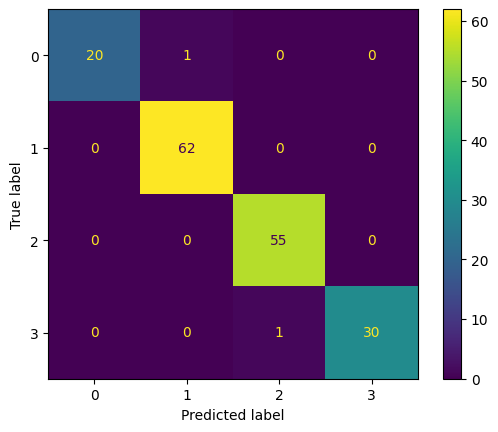

In [ ]:
#The Random Forest Classifier
from  sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)
predictrandom=random.predict(x_test)
accuracyrandom=accuracy_score(y_test,predictrandom)
print('\nThe Accuracy of the Random Forest Classifier model is :',round(accuracyrandom*100,2),'%\n')
cm=confusion_matrix(y_test,predictrandom)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()


The Accuracy of the Naive Bayes model is : 77.51 %



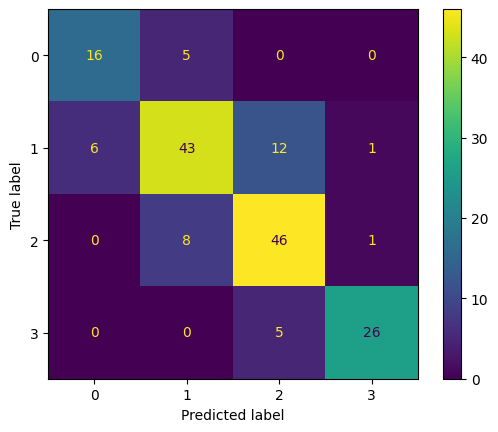

In [ ]:
#The Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
predictnb=nb.predict(x_test)
accuracynb=accuracy_score(y_test,predictnb)
print('\nThe Accuracy of the Naive Bayes model is :',round(accuracynb*100,2),'%\n')
cm=confusion_matrix(y_test,predictnb)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()


The Accuracy of the SVM  model is :  86.39 %



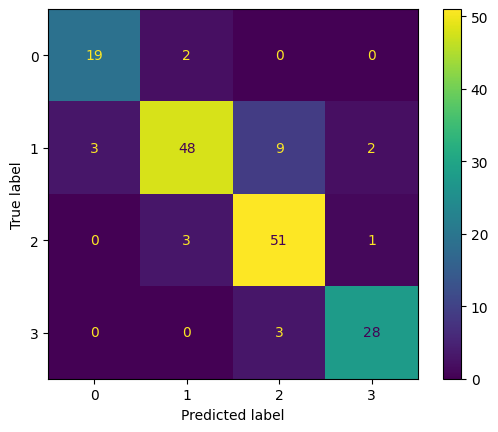

In [ ]:
# The SVM model
from sklearn import svm
SVM=svm.SVC()
SVM.fit(x_train,y_train)
predictsvm=SVM.predict(x_test)
accuracy=accuracy_score(y_test,predictsvm)
print('\nThe Accuracy of the SVM  model is : ',round(accuracy*100,2),'%\n')
cm=confusion_matrix(y_test,predictsvm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()


In [ ]:
#From the above given analysis we get that the best model are Random Forest Classifier and Decision Tree Classifier with both having an accuracy rate of 98.82% 
#which surpasses the SVM model with 86.39% , KNN model with 94.08% and Navie Bayes model with 77.51%.
#Making the Random Forest Classifier and Decision Tree Classifier as the best model to opt to calculate the accuracy with best result.
